<a href="https://colab.research.google.com/github/DhavanBNaik/HateSpeechRecognition/blob/main/H_S_REC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uploading dataset
from google.colab import files
uploaded = files.upload()


Saving labeled_data.csv to labeled_data.csv


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load
import io
cv = CountVectorizer(max_features = 75)

In [ ]:
import io
text = []
clas = []
df = pd.read_csv(io.BytesIO(uploaded['labeled_data.csv']))
text = df['tweet'].tolist()
clas = df['class'].tolist()
print(df)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [ ]:
'''To check how many such tweets data
we have let’s print the shape of the data frame'''
df.shape

(24783, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


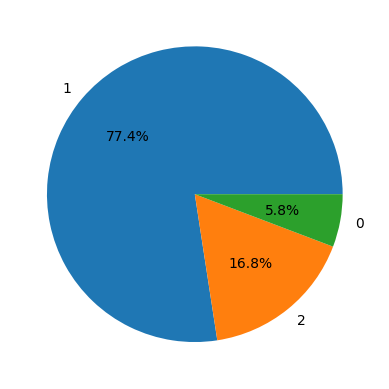

In [ ]:
plt.pie(df['class'].value_counts().values,
        labels = df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

0 - Hate Speech 1 - Offensive Language 2 - Neither

In [ ]:
#New Data Frame for easy Processing
df = pd.DataFrame({'tweet': text, 'class': clas})

In [ ]:
#Checking for missing data
print(df.isnull().sum())

tweet    0
class    0
dtype: int64


In [ ]:
#Converting data to lower case
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [ ]:
#Punctuation Removal
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-10-f75bab5d7a18>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


In [ ]:
#Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

In [ ]:
#removing stopwords
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-12-7984fdbd77dd>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


In [ ]:
#Bag of Words approach for final data Preparation.
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy is:  0.8395427034297243


['rf.joblib']

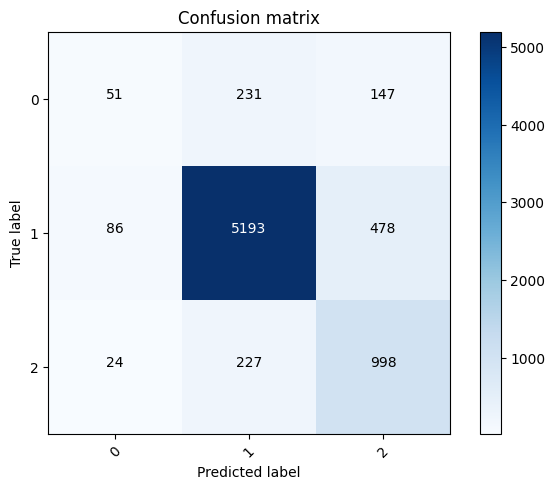

In [ ]:
#Using Random Forest Classifier as the Model and printing evaluating it using confusion matrix
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'rf.joblib')

Random Forest Classifier as Model

accuracy is:  0.8221923335574983


['decision.joblib']

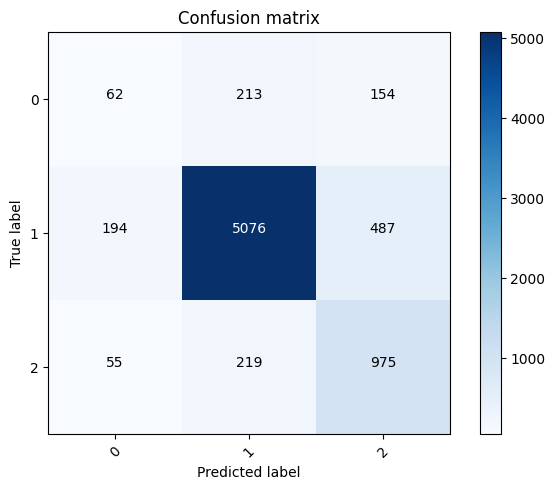

In [ ]:
#Using Decision tree as the Model and printing evaluating it using confusion matrix
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib')

Decision Tree as Model

accuracy is:  0.8468056489576328


['ada.joblib']

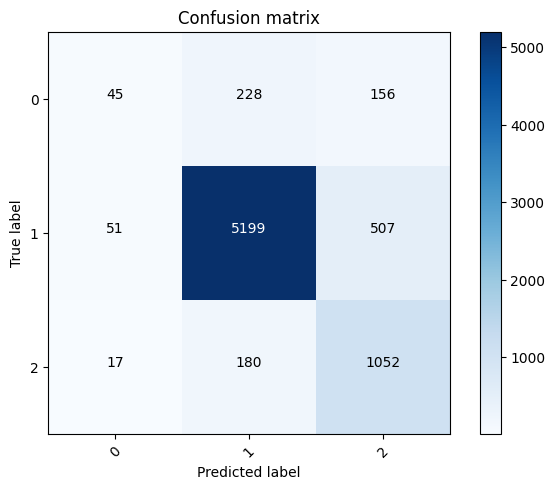

In [ ]:
#Using AdaBoost Classifier as the Model and printing evaluating it using confusion matrix
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'ada.joblib')

Ada Boost Classifier as Model

In [ ]:
#categorical format
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

In [ ]:
#Creating and Training an LSTM Model
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
272/272 [==============================] - 184s 659ms/step - loss: 0.4188 - accuracy: 0.7717 - val_loss: 0.4028 - val_accuracy: 0.7743
Epoch 2/20
272/272 [==============================] - 180s 661ms/step - loss: 0.4021 - accuracy: 0.7743 - val_loss: 0.4014 - val_accuracy: 0.7743
Epoch 3/20
272/272 [==============================] - 181s 664ms/step - loss: 0.4014 - accuracy: 0.7743 - val_loss: 0.4017 - val_accuracy: 0.7743
Epoch 4/20
272/272 [==============================] - 179s 655ms/step - loss: 0.4013 - accuracy: 0.7743 - val_loss: 0.4008 - val_accuracy: 0.7743
Epoch 5/20
272/272 [==============================] - 179s 658ms/step - loss: 0.4003 - accuracy: 0.7743 - val_loss: 0.3984 - val_accuracy: 0.7743
Epoch 6/20
272/272 [==============================] - 180s 663ms/step - loss: 0.3936 - accuracy: 0.7743 - val_loss: 0.3885 - val_accuracy: 0.7743
Epoch 7/20
272/272 [==============================] - 179s 658ms/step - loss: 0.3881 - accuracy: 0.7743 - val_loss: 0.3765 -

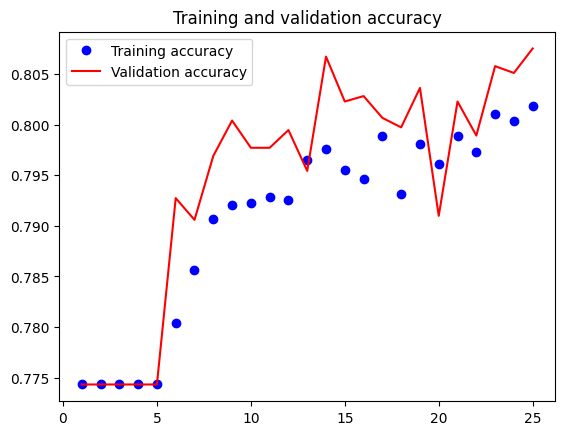

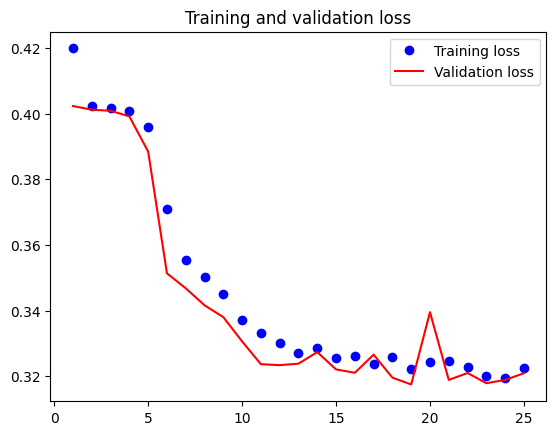

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

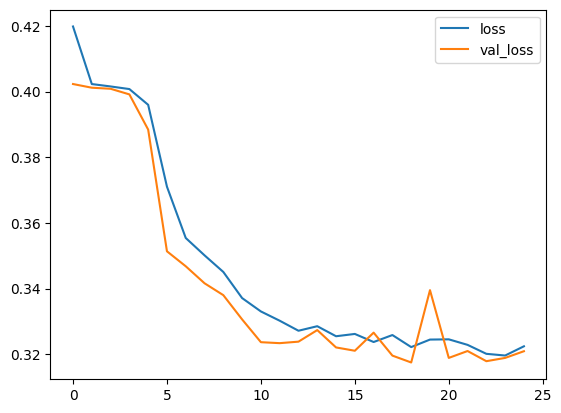

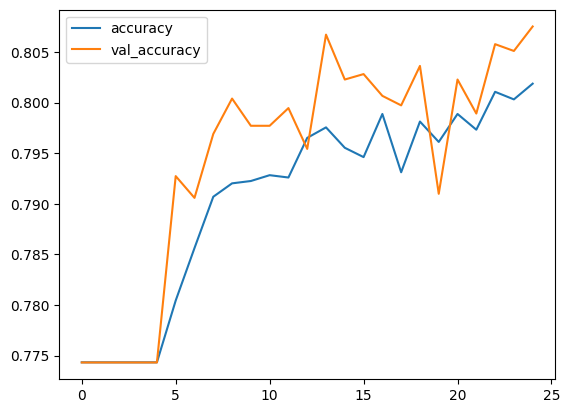

In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Models/HateSpeech.h5')

In [ ]:
import pickle


In [ ]:
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 100)           23233700  
                                                                 
 spatial_dropout1d (SpatialD  (None, 75, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 20)                9680      
                                                                 
 dense (Dense)               (None, 3)                 63        
                                                                 
Total params: 23,243,443
Trainable params: 23,243,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


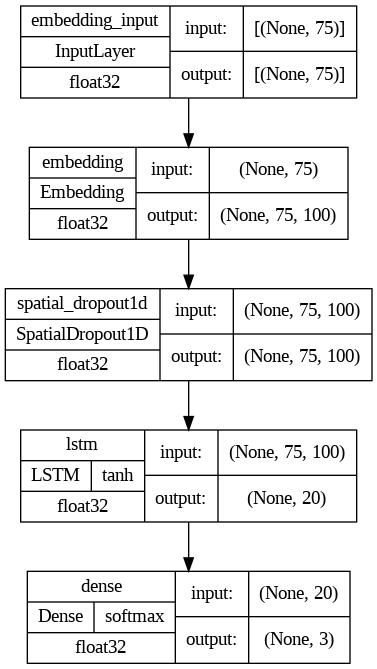

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [ ]:
hs=pickle.load(open("/content/drive/MyDrive/pw4/model.pkl",'rb'))

In [ ]:
i='hello there' #input
i=cv.transform([i]).toarray()
j=hs.predict((i))
classes=np.argmax(j,axis=1)
print("Offensive language :",round((j[0][0]*100),2),"%")
print("Hate speech :",round((j[0][1]*100),2),"%")
print("Neither :",round((j[0][2]*100),2),"%")
if classes==0:
  print("The text is very Offensive")
elif classes==1:
  print("Hate speech Detected with",round((j[0][0]*100),2),"% offensive language" )
else:
  print("No hate speech detected")

1/1 [==============================] - 0s 64ms/step
Offensive language : 15.89 %
Hate speech : 49.62 %
Neither : 34.49 %
Hate speech Detected with 15.89 % offensive language
